In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [4]:
# Standardize the features (not required for some measures)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
# Initialize the feature selection methods
methods = {
    'Information Gain': mutual_info_classif,
    'Fisher’s Score': f_classif,
    'Gain Ratio': None,  # Gain Ratio is not available directly in scikit-learn
    'Gini Index': None,  # Gini Index is not available directly in scikit-learn
    'Chi-Square': chi2,
    'Pearson’s Correlation': None,  # Pearson’s Correlation is not suitable for classification
}

results = {}

In [6]:
# Initialize the feature selection methods
methods = {
    'Information Gain': mutual_info_classif,
    'Fisher’s Score': f_classif,
    'Gain Ratio': None,  # Gain Ratio is not available directly in scikit-learn
    'Gini Index': None,  # Gini Index is not available directly in scikit-learn
    'Chi-Square': chi2,
    'Pearson’s Correlation': None,  # Pearson’s Correlation is not suitable for classification
}

results = {}

In [7]:
# Convert the results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=iris.feature_names)


In [8]:
# Display the results in a tabular format
print("Feature Scores:")
print(results_df)

Feature Scores:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


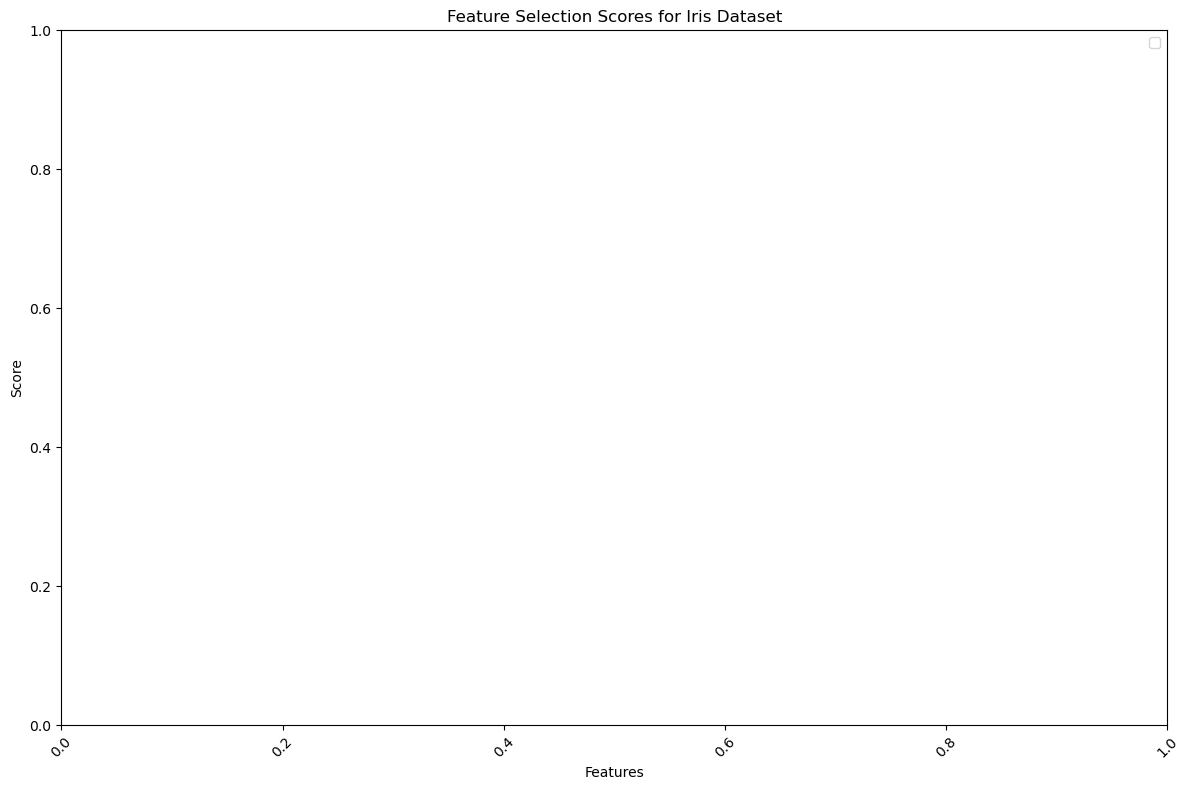

In [9]:
# Plot the results in a graphical format
plt.figure(figsize=(12, 8))
for method_name, scores in results.items():
    if method_name not in ['Gain Ratio', 'Gini Index', 'Pearson’s Correlation']:
        plt.bar(iris.feature_names, scores, label=method_name, alpha=0.7)
plt.title('Feature Selection Scores for Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Input X must be non-negative.